# Implementation of Reinforcement Learning algorithms for cliffwalking environment

In [1]:
import gym
import gym.spaces
import numpy as np
import random
import scipy
import matplotlib.pyplot as plot
import time

#Cliffwalking gym environment
env = gym.make('Roulette-v0')

In [3]:
def execute():
    print ("Ausführungsphase")
    # Umgebung zurücksetzen
    env.reset()
    # Variablen initialisieren
    done = False
    steps = 0
    score = 0
    
    while(done == False):
        # Bewertung der Aktionen:
        # -100 für Fallen (Cliff)
        # -1 für alle anderen Aktionen
        # next_state, reward, done, _ = env.step(action)
        # 0 = Up, 1 = Right, 2 = Down, 3 = Left
        
        # Zählt die Schritte bis zum Spielende
        steps += 1
        # Wählt eine zufällige Aktion aus allen verfügbaren (dem action_space)
        action = env.action_space.sample() 
              
        # Führe die ausgewählte Aktion aus
        _, reward, done,_ = env.step(action)
        
        score += reward
        
    print (f"Schritte: {steps}, Ergebnis: {score}")

In [7]:
execute()

Ausführungsphase
Schritte: 47, Ergebnis: -4.0


In [8]:
# Agent.py
 
import numpy as np
 
class Agent:
    """
    The Base class that is implemented by
    other classes to avoid the duplicate 'choose_action'
    method
    """
    def choose_action(self, state):
        action = 0
        if np.random.uniform(0, 1) < self.epsilon:
            action = self.action_space.sample()
        else:
            action = np.argmax(self.Q[state, :])
        return action

## Q-Learning

In [9]:
class QLearningAgent(Agent):
    def __init__(self, epsilon, alpha, gamma, num_state, num_actions, action_space):
        """
        Constructor
        Args:
            epsilon: The degree of exploration
            gamma: The discount factor
            num_state: The number of states
            num_actions: The number of actions
            action_space: To call the random action
        """
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.num_state = num_state
        self.num_actions = num_actions
 
        self.Q = np.zeros((self.num_state, self.num_actions))
        self.action_space = action_space
        
    def update(self, state, next_state, reward, action, next_action):
        """
        Update the action value function using the Q-Learning update.
        Q(S, A) = Q(S, A) + alpha(reward + (gamma * Q(S_, A_) - Q(S, A))
        Args:
            state: The current state
            next_state: The next state
            reward: The reward for taking the respective action
            action: The current action
            next_action: The next action
        Returns:
            None
        """
        target = reward + self.gamma * np.max(self.Q[next_state, :])
        self.Q[state, action] += self.alpha * (target - self.Q[state, action])

# SARSA

In [10]:
class SarsaAgent(Agent):
    """
    The Agent that uses SARSA update to improve it's behaviour
    """
    def __init__(self, epsilon, alpha, gamma, num_state, num_actions, action_space):
        """
        Constructor
        Args:
            epsilon: The degree of exploration
            gamma: The discount factor
            num_state: The number of states
            num_actions: The number of actions
            action_space: To call the random action
        """
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.num_state = num_state
        self.num_actions = num_actions
 
        self.Q = np.zeros((self.num_state, self.num_actions))
        self.action_space = action_space
 
    def update(self, state, next_state, reward, action, next_action):
        """
        Update the action value function using the SARSA update.
        Q(S, A) = Q(S, A) + alpha(reward + (gamma * Q(S_, A_) - Q(S, A))
        Args:
            state: The current state
            next_state: The next state
            reward: The reward for taking the respective action
            action: The current action
            next_action: The next action
        Returns:
            None
        """
        target = reward + self.gamma * self.Q[next_state, next_action]
        self.Q[state, action] += self.alpha * (target - self.Q[state, action])

## Double Q

In [11]:
class DoubleQAgent(Agent):
    def __init__(self, epsilon, alpha, gamma, num_state, num_actions, action_space):
        """
        Constructor
        Args:
            epsilon: The degree of exploration
            gamma: The discount factor
            num_state: The number of states
            num_actions: The number of actions
            action_space: To call the random action
        """
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.num_state = num_state
        self.num_actions = num_actions
 
        self.Q1 = np.zeros((self.num_state, self.num_actions))
        self.Q2 = np.zeros((self.num_state, self.num_actions))
        self.Q = np.zeros((self.num_state, self.num_actions))
        self.action_space = action_space
    def update(self, state, next_state, reward, action, next_action):
        """
        Update the action value function using the Double-Q update.
        Q1(S, A) = Q1(S, A) + alpha(reward + (gamma * Q2(S_, A_) - Q1(S, A))
        or
        Q2(S, A) = Q2(S, A) + alpha(reward + (gamma * Q1(S_, A_) - Q2(S, A))
        Args:
            state: The previous state
            next_state: The next state
            reward: The reward for taking the respective action
            prev_action: The previous action
            next_action: The next action
        Returns:
            None
        """
        if np.random.rand() < 0.5:
            target = reward + self.gamma * self.Q2[next_state, np.argmax(self.Q1[next_state])]
            self.Q1[state, action] += self.alpha * (target - self.Q1[state, action])
            
        else:
            target = reward + self.gamma * self.Q1[next_state, np.argmax(self.Q2[next_state])]
            self.Q2[state, action] += self.alpha * (target - self.Q2[state, action])
            
        self.Q = self.Q1 + self.Q2  
    

## Expected Sarsa

In [12]:
class ExpectedSarsaAgent(Agent):
    def __init__(self, epsilon, alpha, gamma, num_state, num_actions, action_space):
        """
        Constructor
        Args:
            epsilon: The degree of exploration
            gamma: The discount factor
            num_state: The number of states
            num_actions: The number of actions
            action_space: To call the random action
        """
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.num_state = num_state
        self.num_actions = num_actions
 
        self.Q = np.zeros((self.num_state, self.num_actions))
        self.action_space = action_space
    def update(self, state, next_state, reward, action, next_action):
        """
        Update the action value function using the Expected SARSA update.
        Q(S, A) = Q(S, A) + alpha(reward + sum(pi * Q(S_, A_) - Q(S, A))
        Args:
            state: The current state
            next_state: The next state
            reward: The reward for taking the respective action
            action: The current action
            next_action: The next action
        Returns:
            None
        """ 
 

        next_state_probs = [self.epsilon/self.num_actions] * self.num_actions
        best_action = random.choice(np.argwhere(self.Q[state] == np.max(self.Q[state])))[0]
        next_state_probs[best_action] += (1-self.epsilon)    
    
        q_next_state = self.Q[next_state]
        
        expected_q = sum([a*b for a, b in zip(next_state_probs, q_next_state)])
        
 
        target = reward + self.gamma * expected_q
        self.Q[state, action] += self.alpha * (target - self.Q[state, action])

## SARSA $\lambda$

In [13]:
class SarsaLambdaAgent(Agent):
    def __init__(self, epsilon, alpha, gamma, num_state, num_actions, action_space):
        """
        Constructor
        Args:
            epsilon: The degree of exploration
            gamma: The discount factor
            num_state: The number of states
            num_actions: The number of actions
            action_space: To call the random action
        """
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.lambda_ = 0.9
        self.num_state = num_state
        self.num_actions = num_actions
 
        self.Q = np.zeros((self.num_state, self.num_actions))
        self.E = np.zeros((self.num_state, self.num_actions))
        self.action_space = action_space
        
    def update(self, state, next_state, reward, action, next_action):
        """
        Update the action value function using the SARSA lambda update.
        Q(S, A) = Q(S, A) + alpha * delta * E(S, A)
        Args:
            state: The current state
            next_state: The next state
            reward: The reward for taking the respective action
            action: The current action
            next_action: The next action
        Returns:
            None
        """ 
 
        delta = reward + self.gamma * self.Q[next_state, next_action] - self.Q[state, action]
        self.E[state, action] += 1
        self.Q += self.alpha * delta * self.E
        
        # decay eligibility trace after update
        self.E *= self.gamma*self.lambda_

## Execution and Analysis

SarsaAgent
Iteration: 0, Score: -14.0
Iteration: 10, Score: -7.0
Iteration: 20, Score: -2.0
Iteration: 30, Score: 2.0
Iteration: 40, Score: 0
Iteration: 50, Score: 0
Iteration: 60, Score: 0
Iteration: 70, Score: 0
Iteration: 80, Score: 0.0
Iteration: 90, Score: 0
Iteration: 100, Score: 0
Iteration: 110, Score: 0
Iteration: 120, Score: 0
Iteration: 130, Score: 0
Iteration: 140, Score: 0
Iteration: 150, Score: 0
Iteration: 160, Score: 0
Iteration: 170, Score: 0
Iteration: 180, Score: 0
Iteration: 190, Score: 0
Iteration: 200, Score: 0
Iteration: 210, Score: 0
Iteration: 220, Score: 0
Iteration: 230, Score: 0
Iteration: 240, Score: 0
Iteration: 250, Score: 0
Iteration: 260, Score: 0
Iteration: 270, Score: 0
Iteration: 280, Score: 0
Iteration: 290, Score: 0
Iteration: 300, Score: 0
Iteration: 310, Score: 0
Iteration: 320, Score: -16.0
Iteration: 330, Score: 0
Iteration: 340, Score: 0
Iteration: 350, Score: 0
Iteration: 360, Score: 0
Iteration: 370, Score: -10.0
Iteration: 380, Score: 0
Ite

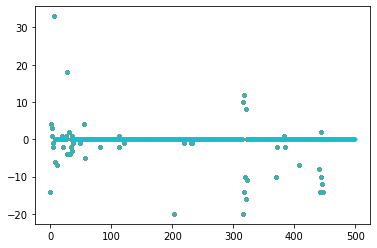

QLearningAgent
Iteration: 0, Score: 6.0
Iteration: 10, Score: 2.0
Iteration: 20, Score: 0
Iteration: 30, Score: 0
Iteration: 40, Score: 0
Iteration: 50, Score: 0
Iteration: 60, Score: 0
Iteration: 70, Score: 0
Iteration: 80, Score: 0
Iteration: 90, Score: 0
Iteration: 100, Score: 0
Iteration: 110, Score: 0
Iteration: 120, Score: 0
Iteration: 130, Score: 0
Iteration: 140, Score: 0
Iteration: 150, Score: 0
Iteration: 160, Score: 0
Iteration: 170, Score: 0
Iteration: 180, Score: 0
Iteration: 190, Score: 0
Iteration: 200, Score: 0
Iteration: 210, Score: 0
Iteration: 220, Score: 1.0
Iteration: 230, Score: 0
Iteration: 240, Score: 0
Iteration: 250, Score: 0
Iteration: 260, Score: 0
Iteration: 270, Score: 0
Iteration: 280, Score: 0
Iteration: 290, Score: 0
Iteration: 300, Score: 0
Iteration: 310, Score: 0
Iteration: 320, Score: 0
Iteration: 330, Score: 0
Iteration: 340, Score: 0
Iteration: 350, Score: 0
Iteration: 360, Score: 0
Iteration: 370, Score: 1.0
Iteration: 380, Score: 0
Iteration: 39

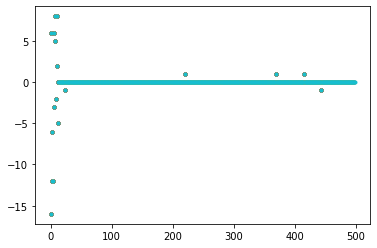

DoubleQAgent
Iteration: 0, Score: -6.0
Iteration: 10, Score: -4.0
Iteration: 20, Score: 4.0
Iteration: 30, Score: 1.0
Iteration: 40, Score: 4.0
Iteration: 50, Score: -13.0
Iteration: 60, Score: -3.0
Iteration: 70, Score: -5.0
Iteration: 80, Score: -11.0
Iteration: 90, Score: -2.0
Iteration: 100, Score: 4.0
Iteration: 110, Score: 0.0
Iteration: 120, Score: -3.0
Iteration: 130, Score: 0
Iteration: 140, Score: 10.0
Iteration: 150, Score: -14.0
Iteration: 160, Score: 8.0
Iteration: 170, Score: -8.0
Iteration: 180, Score: 1.0
Iteration: 190, Score: 0.0
Iteration: 200, Score: -2.0
Iteration: 210, Score: -3.0
Iteration: 220, Score: -8.0
Iteration: 230, Score: 6.0
Iteration: 240, Score: -2.0
Iteration: 250, Score: 2.0
Iteration: 260, Score: 5.0
Iteration: 270, Score: 0.0
Iteration: 280, Score: -2.0
Iteration: 290, Score: 13.0
Iteration: 300, Score: 7.0
Iteration: 310, Score: 3.0
Iteration: 320, Score: -4.0
Iteration: 330, Score: 4.0
Iteration: 340, Score: 5.0
Iteration: 350, Score: 8.0
Iterati

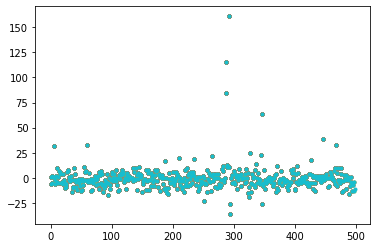

ExpectedSarsaAgent
Iteration: 0, Score: -6.0
Iteration: 10, Score: 0
Iteration: 20, Score: 0
Iteration: 30, Score: 0
Iteration: 40, Score: 0
Iteration: 50, Score: 0
Iteration: 60, Score: 0
Iteration: 70, Score: 0
Iteration: 80, Score: 0
Iteration: 90, Score: -2.0
Iteration: 100, Score: 0
Iteration: 110, Score: 0.0
Iteration: 120, Score: 0
Iteration: 130, Score: 0
Iteration: 140, Score: 0
Iteration: 150, Score: 0
Iteration: 160, Score: 0
Iteration: 170, Score: 0
Iteration: 180, Score: 0
Iteration: 190, Score: 0
Iteration: 200, Score: 0
Iteration: 210, Score: 0
Iteration: 220, Score: 0
Iteration: 230, Score: 0
Iteration: 240, Score: 0
Iteration: 250, Score: 0
Iteration: 260, Score: 0
Iteration: 270, Score: 0
Iteration: 280, Score: 0
Iteration: 290, Score: 0
Iteration: 300, Score: 0
Iteration: 310, Score: 0
Iteration: 320, Score: 0
Iteration: 330, Score: 0
Iteration: 340, Score: 0
Iteration: 350, Score: 0
Iteration: 360, Score: 0
Iteration: 370, Score: 0
Iteration: 380, Score: 0
Iteration

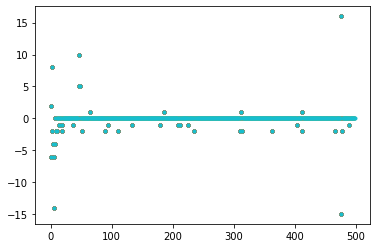

SarsaLambdaAgent
Iteration: 0, Score: 8.0
Iteration: 10, Score: 0
Iteration: 20, Score: 0
Iteration: 30, Score: -12.0
Iteration: 40, Score: -32.0
Iteration: 50, Score: -2.0
Iteration: 60, Score: -8.0
Iteration: 70, Score: 0
Iteration: 80, Score: 0
Iteration: 90, Score: 0
Iteration: 100, Score: 0
Iteration: 110, Score: 0
Iteration: 120, Score: 0
Iteration: 130, Score: 8.0
Iteration: 140, Score: -16.0
Iteration: 150, Score: 4.0
Iteration: 160, Score: 12.0
Iteration: 170, Score: -8.0
Iteration: 180, Score: -4.0
Iteration: 190, Score: 10.0
Iteration: 200, Score: 2.0
Iteration: 210, Score: -16.0
Iteration: 220, Score: 18.0
Iteration: 230, Score: -12.0
Iteration: 240, Score: -2.0
Iteration: 250, Score: -16.0
Iteration: 260, Score: 0.0
Iteration: 270, Score: -2.0
Iteration: 280, Score: 0
Iteration: 290, Score: 0
Iteration: 300, Score: 0
Iteration: 310, Score: -12.0
Iteration: 320, Score: -10.0
Iteration: 330, Score: 2.0
Iteration: 340, Score: 16.0
Iteration: 350, Score: 4.0
Iteration: 360, Sc

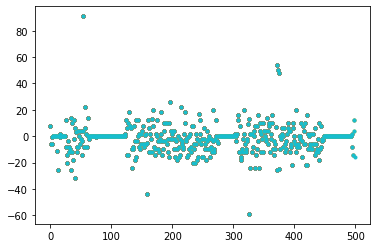

SARSA Average Sum of Reward: -0.26
Q-Learning Average Sum of Return: -0.04
Double-Q Average Sum of Return: -0.504
Expected Sarsa Average Sum of Return: -0.076
Sarsa lambda Average Sum of Return: -1.648


In [15]:
# Defining all the required parameters
epsilon = 0.1
total_episodes = 500
max_steps = 100
alpha = 0.5
gamma = 1

"""
    The two parameters below are used to calculate
    the reward by each algorithm
"""
episodeReward = 0
totalReward = {
    'SarsaAgent': [],
    'QLearningAgent': [],
    'DoubleQAgent': [],
    'ExpectedSarsaAgent': [],
    'SarsaLambdaAgent': []
}
 
# Defining all the agents
expectedSarsaAgent = ExpectedSarsaAgent(
    epsilon, alpha, gamma, env.observation_space.n,
    env.action_space.n, env.action_space)
qLearningAgent = QLearningAgent(
    epsilon, alpha, gamma, env.observation_space.n,
    env.action_space.n, env.action_space)
doubleQAgent = DoubleQAgent(
    epsilon, alpha, gamma, env.observation_space.n,
    env.action_space.n, env.action_space)
sarsaAgent = SarsaAgent(
    epsilon, alpha, gamma, env.observation_space.n,
    env.action_space.n, env.action_space)
sarsaLambdaAgent = SarsaLambdaAgent(
    epsilon, alpha, gamma, env.observation_space.n,
    env.action_space.n, env.action_space)
 
# Now we run all the episodes and calculate the reward obtained by
# each agent at the end of the episode
 
agents = [sarsaAgent, qLearningAgent, doubleQAgent, expectedSarsaAgent, sarsaLambdaAgent]
 
for agent in agents:
    print(type(agent).__name__)
    scores = []
    start = time.time()
    for episode in range(total_episodes):
        # Initialize the necessary parameters before
        # the start of the episode
        t = 0
        state1 = env.reset()
        action1 = agent.choose_action(state1)
        episodeReward = 0
        while t < max_steps:
 
            # Getting the next state, reward, and other parameters
            state2, reward, done, info = env.step(action1)
     
            # Choosing the next action
            action2 = agent.choose_action(state2)
             
            # Learning the Q-value
            agent.update(state1, state2, reward, action1, action2)
     
            state1 = state2
            action1 = action2
             
            # Updating the respective vaLues
            t += 1
            episodeReward += reward
             
            # If at the end of learning process
            if done:
                break
                
        scores.append(episodeReward)
        # Plot episode Rewards
        plot.plot(scores, ".")
        # Append the sum of reward at the end of the episode
        totalReward[type(agent).__name__].append(episodeReward)
        
        # Show reward every 100 episodes
        if(episode % 10 == 0):
            print (f"Iteration: {episode}, Score: {episodeReward}")
            
        # Epsilon reduction (if still over a specific minimum)
        if (agent.epsilon > 0.01):
            agent.epsilon *= 0.98
    
    end = time.time()
    print("Learning took .2fs" % (end - start))    
    plot.show()
    
env.close()
 
# Calculate the mean of sum of returns for each episode
meanReturn = {
    'SARSA-Agent': np.mean(totalReward['SarsaAgent']),
    'Q-Learning-Agent': np.mean(totalReward['QLearningAgent']),
    'Double-Q-Agent': np.mean(totalReward['DoubleQAgent']),
    'Expected-SARSA-Agent': np.mean(totalReward['ExpectedSarsaAgent']), 
    'SARSA-lambda-Agent': np.mean(totalReward['SarsaLambdaAgent'])
}
 
# Print the results
print(f"SARSA Average Sum of Reward: {meanReturn['SARSA-Agent']}")
print(f"Q-Learning Average Sum of Return: {meanReturn['Q-Learning-Agent']}")
print(f"Double-Q Average Sum of Return: {meanReturn['Double-Q-Agent']}")
print(f"Expected Sarsa Average Sum of Return: {meanReturn['Expected-SARSA-Agent']}")
print(f"Sarsa lambda Average Sum of Return: {meanReturn['SARSA-lambda-Agent']}")

In [31]:
for agent in agents:
    print ("Executing", type(agent).__name__)
        
    # reset env and initialize variables
    done = False
    state = env.reset()
    score = 0
    steps = 0
            
    while(done == False):
        # Count steps
        steps += 1
        # Choose action according to policy
        action = np.argmax(agent.Q[state, :])
        # Execute action
        next_state, reward, done, _ = env.step(action)
        score += reward
        # Continue
        state = next_state
        
            
        
    print ((f"Steps to goal: {steps}, Score: {score}"))

Executing SarsaAgent
Steps to goal: 1, Score: 0
Executing QLearningAgent
Steps to goal: 1, Score: 0
Executing DoubleQAgent
Steps to goal: 100, Score: -4.0
Executing ExpectedSarsaAgent
Steps to goal: 1, Score: 0
Executing SarsaLambdaAgent
Steps to goal: 100, Score: -16.0


Wie SARSA und Q-Learning schnell lernen, ist die beste Option, gar nicht zu spielen, was den Reward auf 0 setzt, aber damit häufig auch maximiert.

## PPO

In [2]:
# Import PPO for algos
from stable_baselines3 import PPO

In [3]:
# This is the AI model
model = PPO('MlpPolicy', env, verbose=1, learning_rate=0.001, 
            n_steps=512)
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=1000000)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.2     |
|    ep_rew_mean     | -1.46    |
| time/              |          |
|    fps             | 210      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 512      |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30.9        |
|    ep_rew_mean          | -2.76       |
| time/                   |             |
|    fps                  | 280         |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 1024        |
| train/                  |             |
|    approx_kl            | 0.017160425 |
|    clip_fraction        | 0.251       |
|    clip_range           | 0.2         |
|    entropy_loss  

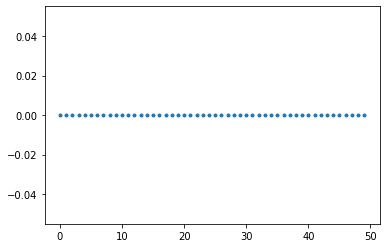

In [4]:
# Start the game 
done = False
rewards = []
reward_acc = 0
# Loop through the game
for i in range(50):
    state = env.reset()
    while (not done): 
    
        action, _ = model.predict(state)
        state, reward, done, info = env.step(action)
        reward_acc += reward
    
    rewards.append(reward_acc)
    # Plot episode Rewards
    reward_acc = 0
    done = False

plot.plot(range(50),rewards, ".")
plot.show()